## Autoencoders

### **Autoencoders are a type of unsupervised neural network (i.e., no class labels or labeled data) that seek to:**

### ---- Steps

1. Accept an input set of data (i.e., the input).

2. Internally compress the input data into a latent-space representation (i.e., a single vector that compresses and quantifies the input).

3. Reconstruct the input data from this latent representation (i.e., the output).


### ---- Typically, autoencoders has two components/subnetworks:

**Encoder**: Accepts the input data and compresses it into the latent-space.

**Decoder**: The decoder is responsible for accepting the latent-space representation (s) and then reconstructing the original input

>> You can thus think of an autoencoder as a network that reconstructs its input!

**Autoencoders are typically used for:**

1. Dimensionality reduction (i.e., think PCA but more powerful/intelligent).
2. Denoising (ex., removing noise and preprocessing images to improve OCR accuracy).
3. Anomaly/outlier detection (ex., detecting mislabeled data points in a dataset or detecting when an input data point falls well outside our typical data distribution).

In [3]:
#---Tensorflow
from pyimagesearch.convautoencoder import ConvAutoencoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
#---Others
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Get the data

In [4]:
((trainX, _), (testX, _)) = mnist.load_data()

In [6]:
#load data
((trainX, _), (testX, _)) = mnist.load_data()
#Add the black and white channel
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
#Normalize the images
trainX = trainX.astype("float32")/255.0
testX = testX.astype('float32')/255.0

### Construct the convolutional autoencoder

In [7]:
(encoder, decoder, autoencoder) = ConvAutoencoder.build(28,28,1)

2022-09-28 00:20:35.781046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 00:20:35.827210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 00:20:35.827410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 00:20:35.828304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
autoencoder.compile(loss="MSE", optimizer=Adam(learning_rate=1e-3))

In [9]:
#We use both the train data as training and labels since this is an usupervised task
H = autoencoder.fit(trainX, trainX, validation_data=(testX, testX), epochs=25, batch_size=32)

Epoch 1/25


2022-09-28 00:23:23.101125: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-28 00:23:24.160578: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-28 00:23:24.161956: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-28 00:23:24.161987: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-28 00:23:24.163018: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-28 00:23:24.163111: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1875/1875 [==============================] - 14s 6ms/step - loss: 0.0183 - val_loss: 0.0106
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 9/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 10/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0073

### Graph the results

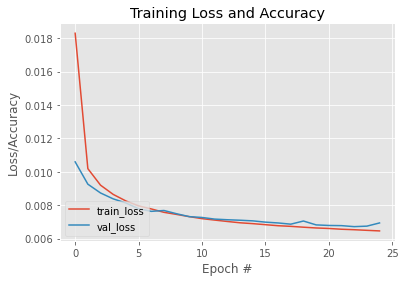

In [10]:
N = np.arange(0, 25)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Make predictions

In [11]:
###Use the autoencoder to make predictions
decoded = autoencoder.predict(testX)
outputs = None 

313/313 [==============================] - 1s 2ms/step


In [15]:
## Create an image of the predictions

#Get 8 test images and 8 predictions
for i in range(0, 8):
    #convert images to uint8 to use with cv2
    original = (testX[i] * 255).astype("uint8")
    recon = (decoded[i]*255).astype("uint8")

    #Stack both images to each other
    output = np.hstack([original, recon])

	# if the outputs array is empty, initialize it as the current
	# side-by-side image display
    if outputs is None:
        outputs = output

    # otherwise, vertically stack the outputs
    else:
        outputs = np.vstack([outputs, output])

# save the outputs image to disk
cv2.imwrite('/media/juan/juan1/pyimage_univ/Autoencoders/intro_autoencoders/ae_out.jpg', outputs)

True